In [1]:
import os
import math
import itertools
import multiprocessing
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
xx

NameError: name 'np' is not defined

In [2]:
import os
import math
import itertools
import multiprocessing
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# gán Columns name cho dataset
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","level"])

# the Index column has binary value
binary_index = [6, 11, 13, 14, 20, 21]

# the Index column has categorical value
categorical_index = [1, 2, 3]

# the index columns has numerical value
numeric_index = list(set(range(41)).difference(categorical_index).difference(binary_index))


# Dictionary that contains mapping of various attacks to the four main categories
attack_dict = {
    'normal': 'normal',

    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',

    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',

    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

In [4]:
df = pd.read_csv('D:\\CODE\\Dataset\\NSL-KDD\\KDDTrain+.txt')
df.columns = col_names
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
(df.groupby('normal').count().show())

KeyError: 'normal'

In [6]:
(df.groupby('labels').count().show())

AttributeError: 'DataFrame' object has no attribute 'show'

In [7]:
(df.groupby('labels').count())

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
labels,,,,,,,,,,,,,,,,,,,,,
back,956,956,956,956,956,956,956,956,956,956,...,956,956,956,956,956,956,956,956,956,956
buffer_overflow,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
ftp_write,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
guess_passwd,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
imap,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
ipsweep,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,...,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599
land,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
loadmodule,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
multihop,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [8]:
df.groupby('labels').count().sort_values('normal')

KeyError: 'normal'

In [9]:
df.groupby('labels').agg('normal')

AttributeError: 'normal' is not a valid function for 'DataFrameGroupBy' object

In [10]:
df.count(axis='columns')

0         43
1         43
2         43
3         43
4         43
          ..
125967    43
125968    43
125969    43
125970    43
125971    43
Length: 125972, dtype: int64

In [11]:
df.columns('labels')

TypeError: 'Index' object is not callable

In [12]:
df.columns()

TypeError: 'Index' object is not callable

In [13]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels', 'level'],
      dtype='object')

In [14]:
df.columns.view()

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels', 'level'],
      dtype='object')

In [16]:
df.values()

TypeError: 'numpy.ndarray' object is not callable

In [17]:
df.values

array([[0, 'udp', 'other', ..., 0.0, 'normal', 15],
       [0, 'tcp', 'private', ..., 0.0, 'neptune', 19],
       [0, 'tcp', 'http', ..., 0.01, 'normal', 21],
       ...,
       [0, 'tcp', 'smtp', ..., 0.0, 'normal', 18],
       [0, 'tcp', 'klogin', ..., 0.0, 'neptune', 20],
       [0, 'tcp', 'ftp_data', ..., 0.0, 'normal', 21]], dtype=object)

In [18]:
normal_count = 0
attack_count = 0
for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        # if data_df.iloc[row][col] == 'NH - 01':
        if df.iloc[row][col] == 'normal':
            normal_count = normal_count + 1
        else:
            attack_count = attack_count + 1
print("Count of normal NSL - KDD", normal_count)
print("Count of attack NSL - KDD", attack_count)

NameError: name 'data_df' is not defined

In [ ]:
normal_count = 0
attack_count = 0
for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        # if data_df.iloc[row][col] == 'NH - 01':
        if df.iloc[row][col] == 'normal':
            normal_count = normal_count + 1
        else:
            attack_count = attack_count + 1
print("Count of normal NSL - KDD", normal_count)
print("Count of attack NSL - KDD", attack_count)

In [ ]:
print(1)

In [1]:
normal_count = 0
attack_count = 0
for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        # if data_df.iloc[row][col] == 'NH - 01':
        if df.iloc[row][col] == 'normal':
            normal_count = normal_count + 1
        else:
            attack_count = attack_count + 1
print("Count of normal NSL - KDD", normal_count)
print("Count of attack NSL - KDD", attack_count)

NameError: name 'df' is not defined

In [2]:
import os
import math
import itertools
import multiprocessing
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# gán Columns name cho dataset
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","level"])

# the Index column has binary value
binary_index = [6, 11, 13, 14, 20, 21]

# the Index column has categorical value
categorical_index = [1, 2, 3]

# the index columns has numerical value
numeric_index = list(set(range(41)).difference(categorical_index).difference(binary_index))


# Dictionary that contains mapping of various attacks to the four main categories
attack_dict = {
    'normal': 'normal',

    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',

    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',

    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}
df = pd.read_csv('D:\\CODE\\Dataset\\NSL-KDD\\KDDTrain+.txt')
df.columns = col_names
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [3]:
normal_count = 0
attack_count = 0
for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        # if data_df.iloc[row][col] == 'NH - 01':
        if df.iloc[row][col] == 'normal':
            normal_count = normal_count + 1
        else:
            attack_count = attack_count + 1
print("Count of normal NSL - KDD", normal_count)
print("Count of attack NSL - KDD", attack_count)

Count of normal NSL - KDD 67342
Count of attack NSL - KDD 5349454


In [4]:
df = pd.read_csv('D:\\CODE\\Dataset\\NSL-KDD\\KDDTest+.txt')
df.columns = col_names
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


In [5]:
(df.groupby('labels').count())

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
labels,,,,,,,,,,,,,,,,,,,,,
apache2,737,737,737,737,737,737,737,737,737,737,...,737,737,737,737,737,737,737,737,737,737
back,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,359,359,359,359,359,359
buffer_overflow,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
ftp_write,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
guess_passwd,1231,1231,1231,1231,1231,1231,1231,1231,1231,1231,...,1231,1231,1231,1231,1231,1231,1231,1231,1231,1231
httptunnel,133,133,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,133,133,133
imap,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ipsweep,141,141,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
land,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [6]:
df = pd.read_csv('D:\\CODE\\Dataset\\NSL-KDD\\KDDTrain+.txt')
df.columns = col_names
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

NameError: name 'df_test' is not defined

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ


In [9]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())

   protocol_type  service  flag
0              2       44     9
1              1       49     5
2              1       24     9
3              1       24     9
4              1       49     1


In [10]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2

enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

In [11]:
df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.median()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16096\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


duration                         0.00
src_bytes                       44.00
dst_bytes                        0.00
land                             0.00
wrong_fragment                   0.00
urgent                           0.00
hot                              0.00
num_failed_logins                0.00
logged_in                        0.00
num_compromised                  0.00
root_shell                       0.00
su_attempted                     0.00
num_root                         0.00
num_file_creations               0.00
num_shells                       0.00
num_access_files                 0.00
num_outbound_cmds                0.00
is_host_login                    0.00
is_guest_login                   0.00
count                           14.00
srv_count                        8.00
serror_rate                      0.00
srv_serror_rate                  0.00
rerror_rate                      0.00
srv_rerror_rate                  0.00
same_srv_rate                    1.00
diff_srv_rat

In [13]:
df.median(numeric_only=True)

duration                         0.00
src_bytes                       44.00
dst_bytes                        0.00
land                             0.00
wrong_fragment                   0.00
urgent                           0.00
hot                              0.00
num_failed_logins                0.00
logged_in                        0.00
num_compromised                  0.00
root_shell                       0.00
su_attempted                     0.00
num_root                         0.00
num_file_creations               0.00
num_shells                       0.00
num_access_files                 0.00
num_outbound_cmds                0.00
is_host_login                    0.00
is_guest_login                   0.00
count                           14.00
srv_count                        8.00
serror_rate                      0.00
srv_serror_rate                  0.00
rerror_rate                      0.00
srv_rerror_rate                  0.00
same_srv_rate                    1.00
diff_srv_rat

In [14]:
df.median(asix={20,21},numeric_only=True)

TypeError: median() got an unexpected keyword argument 'asix'

In [15]:
df.median(axis={20,21},numeric_only=True)

TypeError: unhashable type: 'set'

In [16]:
df.median(asix=0,numeric_only=True)

TypeError: median() got an unexpected keyword argument 'asix'

In [17]:
df.median(axis=0,numeric_only=True)


duration                         0.00
src_bytes                       44.00
dst_bytes                        0.00
land                             0.00
wrong_fragment                   0.00
urgent                           0.00
hot                              0.00
num_failed_logins                0.00
logged_in                        0.00
num_compromised                  0.00
root_shell                       0.00
su_attempted                     0.00
num_root                         0.00
num_file_creations               0.00
num_shells                       0.00
num_access_files                 0.00
num_outbound_cmds                0.00
is_host_login                    0.00
is_guest_login                   0.00
count                           14.00
srv_count                        8.00
serror_rate                      0.00
srv_serror_rate                  0.00
rerror_rate                      0.00
srv_rerror_rate                  0.00
same_srv_rate                    1.00
diff_srv_rat

In [18]:
df.median(axis=1,numeric_only=True)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
125967    0.0
125968    0.0
125969    0.0
125970    0.0
125971    0.0
Length: 125972, dtype: float64

In [19]:
df[20,21,22].median(axis=0,numeric_only=True)

KeyError: (20, 21, 22)

In [20]:
df['land'].median(axis=0,numeric_only=True)

NotImplementedError: Series.median does not implement numeric_only.

In [21]:
df['land'].median()

0.0

In [22]:
df['duration'].median()

0.0

In [24]:
df['duration'].describe().mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of count    125972.000000
mean        287.146929
std        2604.525522
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       42908.000000
Name: duration, dtype: float64>

In [25]:
df['duration'].describe().mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of count    125972.000000
mean        287.146929
std        2604.525522
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       42908.000000
Name: duration, dtype: float64>

In [27]:
df['duration'].mean()

287.14692947639156

In [28]:
df.iloc[:,0].mean()

287.14692947639156

In [29]:
df.iloc[:,0].values


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
List = df.iloc[:,0].values

In [31]:
len(List)

125972

In [33]:
df.iloc[:,0].median()


0.0

In [34]:
a = median(20-0)
a

NameError: name 'median' is not defined

In [35]:
import statistics
a = median(20-0)
a

NameError: name 'median' is not defined

In [36]:
import statistics

In [37]:
a = statistics.median(20-0)
a

TypeError: 'int' object is not iterable

In [38]:
a = statistics.median(20-1)

TypeError: 'int' object is not iterable

In [1]:
import matplotlib.pyplot as plt
import numpy as np

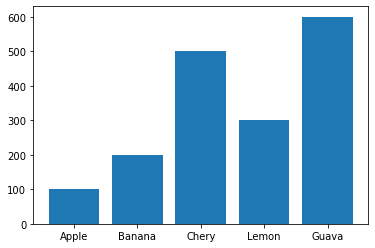

In [2]:
x = np.array(['Apple','Banana','Chery','Lemon', 'Guava'])
y = np.array([100,200,500,300,600])
plt.bar(x,y)
plt.show()

In [3]:
import os
import math
import itertools
import multiprocessing
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# gán Columns name cho dataset
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","level"])

# the Index column has binary value
binary_index = [6, 11, 13, 14, 20, 21]

# the Index column has categorical value
categorical_index = [1, 2, 3]

# the index columns has numerical value
numeric_index = list(set(range(41)).difference(categorical_index).difference(binary_index))


# Dictionary that contains mapping of various attacks to the four main categories
attack_dict = {
    'normal': 'normal',

    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',

    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',

    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}
df = pd.read_csv('D:\\CODE\\Dataset\\NSL-KDD\\KDDTrain+.txt')
df.columns = col_names
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
df[:,0].count(0)

InvalidIndexError: (slice(None, None, None), 0)

In [5]:
df[:,0].count()

InvalidIndexError: (slice(None, None, None), 0)

In [6]:
df[:,0]

InvalidIndexError: (slice(None, None, None), 0)

In [7]:
df.iloc[:,0].count()


125972

In [8]:
df.iloc[:,0].count(0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\3481845969.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. ser.count(level=1) should use ser.groupby(level=1).count().
  df.iloc[:,0].count(0)


ValueError: Series.count level is only valid with a MultiIndex

In [9]:
(df.iloc[:,0].values=='0').count()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10968\1549266907.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (df.iloc[:,0].values=='0').count()


AttributeError: 'bool' object has no attribute 'count'

In [10]:
(df.iloc[:,0].values==0

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [11]:
df[df.duration == 0].shape[0]

115954

In [12]:
df[df.land == 0].shape[0]

125947

In [13]:
df[df.count == 0].shape[0]

KeyError: False

In [14]:
(df[df.land == 0].shape[0] == 0)

False

In [16]:
(df[df.level == 0].shape[0] == 0)

False

In [17]:
df[df['level'] == 0].shape[0]

66

In [18]:
df[df['count'] == 0].shape[0]

13

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# the Index column has binary value
binary_index = [6, 11, 13, 14, 20, 21]

# the Index column has categorical value
categorical_index = [1, 2, 3]




col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","level"])
print(len(col_names))
df = pd.read_csv('D:\\CODE\\Dataset\\NSL-KDD\\KDDTrain+.txt', encoding="utf-8-sig", names = col_names)
# the index columns has numerical value
numeric_index = list(set(range(df.shape[1])).difference(categorical_index))

list_name = list(col_names)
str_name = col_names[22]
print(str_name)
x = []
y = []
for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        print(df.iloc[:, col].values)
        if col == 1 or col == 2 or col == 3:
            break
        else:
            x.append(str_name[col])
            y.append(df[df[col_names[col]] == 0].shape[0] / df.shape[0] * 100)

plt.bar(x,y)
plt.show()

43
count
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp']
[0 0 0 ... 0 0 0]
['tcp' 'udp' 'tcp' ... 'tcp' 'tcp' 'tcp'

KeyboardInterrupt: 

In [ ]:
print(a)

43
x:  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
y:  [92.04750224254403, 39.20840180038579, 53.95362498313131, 99.98015447754678, 99.13473522103942, 99.99285561191684, 97.87970438109753, 99.90315385042827, 60.42644058647488, 98.97914632500616, 99.86584426821621, 99.93649432814968, 99.4848102371143, 99.77217340223699, 99.96269041778794, 99.70549244

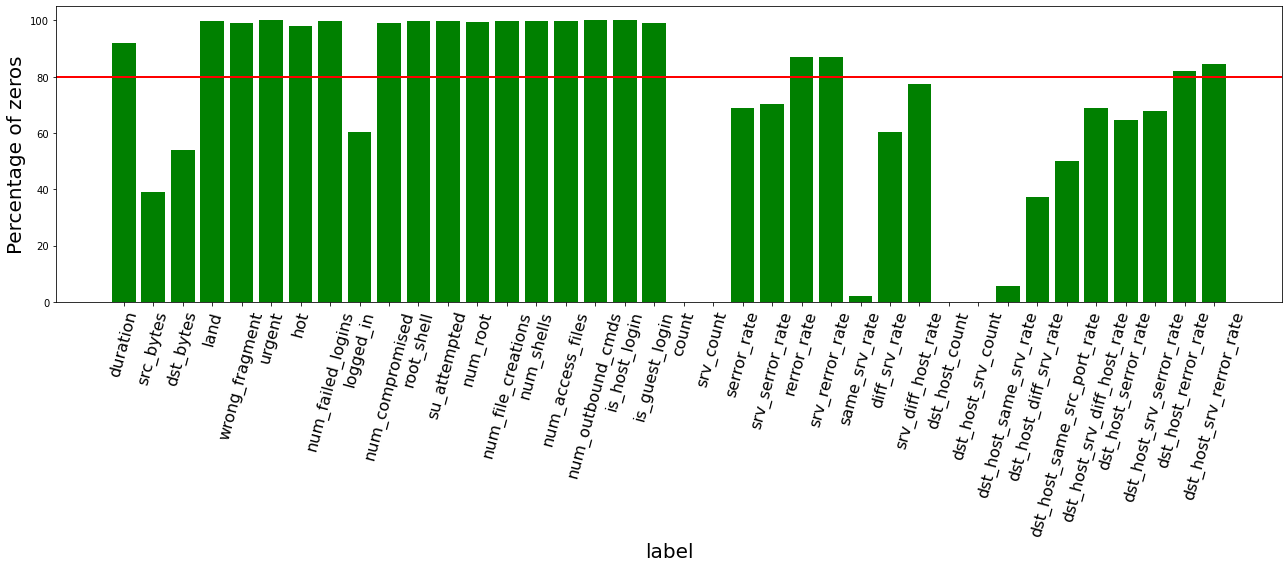

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# the Index column has binary value
binary_index = [6, 11, 13, 14, 20, 21]

# the Index column has categorical value
categorical_index = [1, 2, 3]




col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","level"])
print(len(col_names))
df = pd.read_csv('D:\\CODE\\Dataset\\NSL-KDD\\KDDTrain+.txt', encoding="utf-8-sig", names = col_names)
# the index columns has numerical value
numeric_index = list(set(range(df.shape[1])).difference(categorical_index))

list_name = list(col_names)
# str_name = col_names[22]
# print(str_name)

x = []
y = []
#for row in range(df.shape[0]):
for col in range(len(numeric_index)-2):
        # print(df.iloc[:, col].values)
        # if col == 1 or col == 2 or col == 3:
        #     break
        # else:
    x.append(col_names[numeric_index[col]])
    y.append((df[df[col_names[numeric_index[col]]] == 0].shape[0]) / df.shape[0] * 100)
print('x: ',x)
print('y: ',y)
plt.figure(figsize=(18, 8),tight_layout=True)
plt.bar(x,y,fc='green')
plt.axhline(80, color='red', lw=2)
# plt.bar_label(chart, labels=x, label_type="edge")
plt.xticks(rotation=75,fontsize=16)
plt.xlabel('label', fontsize=20)
plt.ylabel('Percentage of zeros', fontsize=20)
plt.show()

43
x:  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
y:  [92.04750224254403, 39.20840180038579, 53.95362498313131, 99.98015447754678, 99.13473522103942, 99.99285561191684, 97.87970438109753, 99.90315385042827, 60.42644058647488, 98.97914632500616, 99.86584426821621, 99.93649432814968, 99.4848102371143, 99.77217340223699, 99.96269041778794, 99.70549244

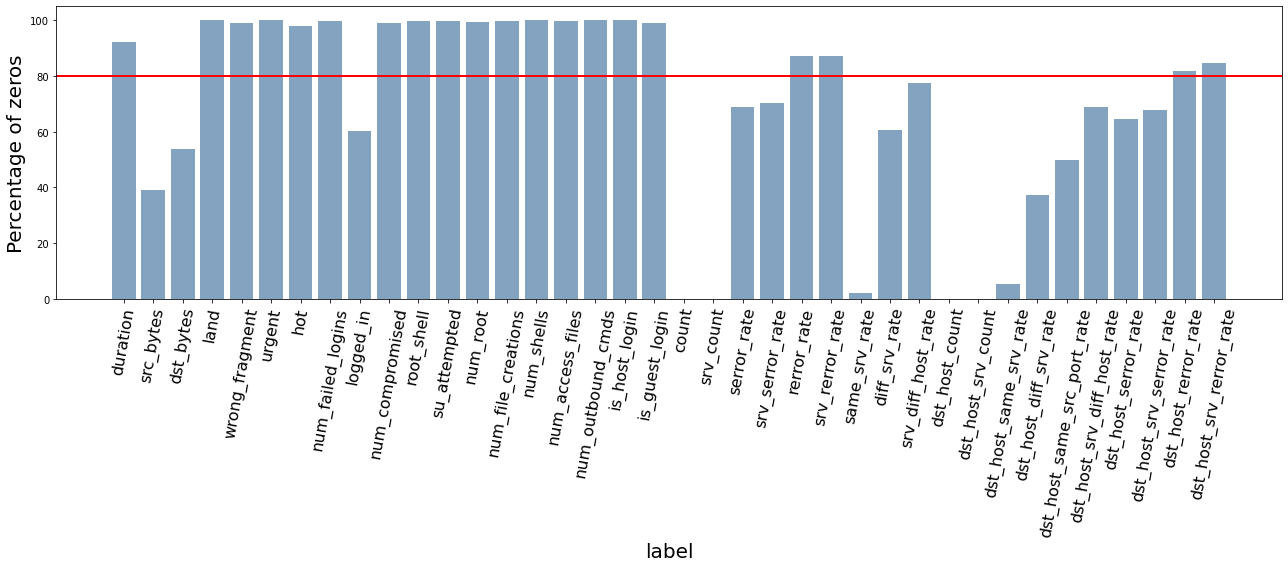

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# the Index column has binary value
binary_index = [6, 11, 13, 14, 20, 21]

# the Index column has categorical value
categorical_index = [1, 2, 3]




col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","level"])
print(len(col_names))
df = pd.read_csv('D:\\CODE\\Dataset\\NSL-KDD\\KDDTrain+.txt', encoding="utf-8-sig", names = col_names)
# the index columns has numerical value
numeric_index = list(set(range(df.shape[1])).difference(categorical_index))

list_name = list(col_names)
# str_name = col_names[22]
# print(str_name)

x = []
y = []
#for row in range(df.shape[0]):
for col in range(len(numeric_index)-2):
        # print(df.iloc[:, col].values)
        # if col == 1 or col == 2 or col == 3:
        #     break
        # else:
    x.append(col_names[numeric_index[col]])
    y.append((df[df[col_names[numeric_index[col]]] == 0].shape[0]) / df.shape[0] * 100)
print('x: ',x)
print('y: ',y)
plt.figure(figsize=(18, 8),tight_layout=True)
plt.bar(x,y, color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(80, color='red', lw=2)
# plt.bar_label(chart, labels=x, label_type="edge")
plt.xticks(rotation=80,fontsize=16)
plt.xlabel('label', fontsize=20)
plt.ylabel('Percentage of zeros', fontsize=20)
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [8]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
